In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [5]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
import re

In [7]:
df.replace('?',np.nan,inplace=True)

In [8]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [9]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [10]:
df['fnlwgt'].nunique()

28523

In [11]:
len(df)

48842

In [12]:
df.drop('fnlwgt',inplace=True,axis=1)

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
si=SimpleImputer(strategy='most_frequent')

In [15]:
col=['workclass','occupation','native-country']

In [16]:
for m in col:
    df[m]=si.fit_transform(df[m].values.reshape(-1,1))

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['income']=le.fit_transform(df['income'].values.reshape(-1,1))

In [18]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [19]:
df.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [20]:
bins=[17,30,45,60,90]
labels=['young','mid-aged','old','very-old']
df['age group']=pd.cut(df['age'],bins,labels=labels)

In [21]:
df['age group'].value_counts()

mid-aged    18505
young       15198
old         10938
very-old     3606
Name: age group, dtype: int64

In [22]:
col=['age', 'workclass', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','age group']

In [23]:
#for m in col:
 #   print(df.groupby(m)['income'].value_counts())
    

In [24]:
#for m in col:
 #   pd.DataFrame(df.groupby(m)['income'].value_counts()).plot.bar()

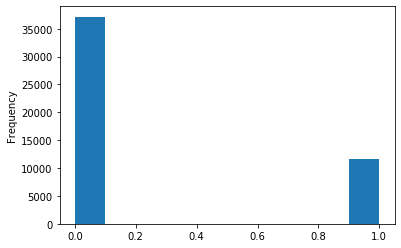

In [25]:
df['income'].plot.hist()

In [26]:
#for m in col:
 #   group=df.groupby(m)['income'].value_counts()
  #  print(group/group.groupby(level=0).sum())

In [27]:
#for m in col:
 #   group=df.groupby(m)['income'].value_counts()
  #  pd.DataFrame(group/group.groupby(level=0).sum()).plot.bar()

In [28]:
df.drop('age group',inplace=True,axis=1)

In [29]:
encode=['workclass','education','marital-status','occupation','relationship','race','gender','native-country']
for m in encode:
    df[m]=le.fit_transform(df[m].values.reshape(-1,1))

In [30]:
df.corr()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.045643,-0.015058,0.030940,-0.263978,-0.000133,-0.263383,0.028421,0.088120,0.077229,0.056944,0.071558,-0.002622,0.230369
workclass,0.045643,1.000000,0.005219,0.007333,-0.020870,0.009841,-0.056073,0.053923,0.066672,0.031558,0.004168,0.042845,-0.004829,-0.000511
education,-0.015058,0.005219,1.000000,0.359668,-0.037417,-0.035126,-0.010758,0.013250,-0.027041,0.028928,0.017638,0.057659,0.075339,0.080091
educational-num,0.030940,0.007333,0.359668,1.000000,-0.069992,0.072706,-0.090534,0.029239,0.009328,0.125146,0.080972,0.143689,0.090137,0.332613
marital-status,-0.263978,-0.020870,-0.037417,-0.069992,1.000000,0.030445,0.187800,-0.070104,-0.127479,-0.043969,-0.033872,-0.185567,-0.017919,-0.199072
occupation,-0.000133,0.009841,-0.035126,0.072706,0.030445,1.000000,-0.034964,-0.005210,0.042579,0.014518,0.011082,-0.015550,-0.001577,0.032550
relationship,-0.263383,-0.056073,-0.010758,-0.090534,0.187800,-0.034964,1.000000,-0.117041,-0.579797,-0.056510,-0.057201,-0.250400,-0.006999,-0.253214
race,0.028421,0.053923,0.013250,0.029239,-0.070104,-0.005210,-0.117041,1.000000,0.086734,0.011581,0.018595,0.039694,0.117553,0.070934
gender,0.088120,0.066672,-0.027041,0.009328,-0.127479,0.042579,-0.579797,0.086734,1.000000,0.047094,0.045480,0.228560,-0.002453,0.214628
capital-gain,0.077229,0.031558,0.028928,0.125146,-0.043969,0.014518,-0.056510,0.011581,0.047094,1.000000,-0.031441,0.082157,0.007919,0.223013


In [31]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.


In [51]:
x=df.drop('income',axis=1)
y=df.iloc[:,-1].values.reshape(-1,1)

In [33]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,stratify=y)

In [34]:
xtrain.shape

(36631, 13)

In [35]:
smk=SMOTETomek()
xtrain,ytrain=smk.fit_sample(xtrain,ytrain)

In [36]:
xtrain.shape

(54782, 13)

In [37]:
lr,rfr,dtc,knn=LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()

In [38]:
model=[lr,rfr,dtc,knn]

In [39]:
#for m in model:
 #   m.fit(xtrain,ytrain)
  #  print(m.score(xtrain,ytrain))
   # print(accuracy_score(m.predict(xtest),ytest))
   # print(classification_report(m.predict(xtest),ytest))
   # print(confusion_matrix(m.predict(xtest),ytest))
   # cv=cross_val_score(m,x,y,cv=10)
   # print(cv.mean())
   # print(cv.std())
    

In [40]:

xtrain=xtrain.values

In [52]:
from keras.utils import np_utils
y=np_utils.to_categorical(y)
xtrain,xtest,ytrain,ytest=train_test_split(x,y,stratify=y)
xtrain=xtrain.values

In [53]:
x.shape

(48842, 13)

In [54]:
y.shape

(48842, 2)

In [142]:
classifier=Sequential()


In [143]:
classifier.add(Dense(output_dim=15,init='uniform',activation='relu',input_dim=13))

In [144]:
#classifier.add(Dense(output_dim=35,init='uniform',activation='sigmoid'))

In [145]:
classifier.add(Dense(output_dim=2,init='uniform',activation='sigmoid'))

In [146]:
classifier.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [147]:
classifier.fit(xtrain,ytrain,batch_size=10,nb_epoch=50)

Epoch 1/50
36631/36631 [==============================] - 9s 244us/step - loss: 0.4716 - accuracy: 0.7954
Epoch 2/50
36631/36631 [==============================] - 9s 249us/step - loss: 0.4447 - accuracy: 0.7992
Epoch 3/50
36631/36631 [==============================] - 9s 238us/step - loss: 0.4248 - accuracy: 0.8021
Epoch 4/50
36631/36631 [==============================] - 8s 225us/step - loss: 0.4210 - accuracy: 0.8171
Epoch 5/50
36631/36631 [==============================] - 8s 223us/step - loss: 0.4184 - accuracy: 0.8209
Epoch 6/50
36631/36631 [==============================] - 8s 218us/step - loss: 0.4235 - accuracy: 0.8225
Epoch 7/50
36631/36631 [==============================] - 7s 199us/step - loss: 0.4171 - accuracy: 0.8246
Epoch 8/50
36631/36631 [==============================] - 8s 228us/step - loss: 0.4221 - accuracy: 0.8254
Epoch 9/50
36631/36631 [==============================] - 9s 233us/step - loss: 0.4282 - accuracy: 0.8255
Epoch 10/50
36631/36631 [=====================

In [148]:
pred=classifier.predict(xtest)

In [149]:
score=classifier.evaluate(xtest,ytest)

12211/12211 [==============================] - 0s 35us/step


In [150]:
score

[0.3551501225033045, 0.8463680148124695]

In [151]:
print("Keras evaluation result:", score[0])
print("Percentage right: {}%.".format(score[1]*100))
print("Error: {}%.\n".format((1-score[1])*100))

Keras evaluation result: 0.3551501225033045
Percentage right: 84.63680148124695%.
Error: 15.363198518753052%.



In [152]:
prediction=[]
for x in pred:
    if x[0]>.50:
        prediction.append(0)
    else:
        prediction.append(1)

In [153]:
prediction

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


In [154]:
y_test=[]
for x in ytest:
    if x[0]==1:
        y_test.append(0)
    else:
        y_test.append(1)
    

In [155]:
confusion_matrix(prediction,y_test)

array([[8538, 1125],
       [ 751, 1797]], dtype=int64)

In [156]:
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      9663
           1       0.61      0.71      0.66      2548

    accuracy                           0.85     12211
   macro avg       0.77      0.79      0.78     12211
weighted avg       0.86      0.85      0.85     12211

